# K Nearest Neighbor Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [2]:
data = pd.read_csv("Data\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 36.9 KB


## Preprocessing

In [4]:
x = data.iloc[:, 2:4].values
y = data.iloc[:, 4].values

### Scaling the data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [6]:
scaler.fit(x)

StandardScaler()

In [7]:
x_scaled = scaler.transform(x)

### Split the data into train and test

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## Creating the model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

### Choosing Best Value

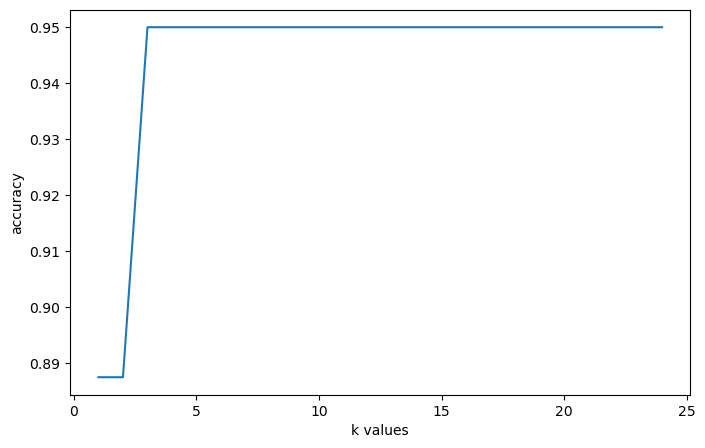

In [10]:
score_list = []
for each in range(1, 25):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
plt.figure(figsize=(8, 5))
plt.plot(range(1, 25), score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [11]:
score_list

[0.8875,
 0.8875,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95]

Best K value is above 1 and 2
We will choose 5 for K Value

In [12]:
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
classifier.fit(x_train, y_train)

KNeighborsClassifier()

### Prediction for Test

In [13]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

### Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

### Accuracy

In [15]:
acc = classifier.score(x_test, y_test)
print(f"Accuracy for Test data : {acc}")
acc = classifier.score(x_train, y_train)
print(f"Accuracy for Training data : {acc}")

Accuracy for Test data : 0.95
Accuracy for Training data : 0.91875


## ROC and AUC

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

In [19]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

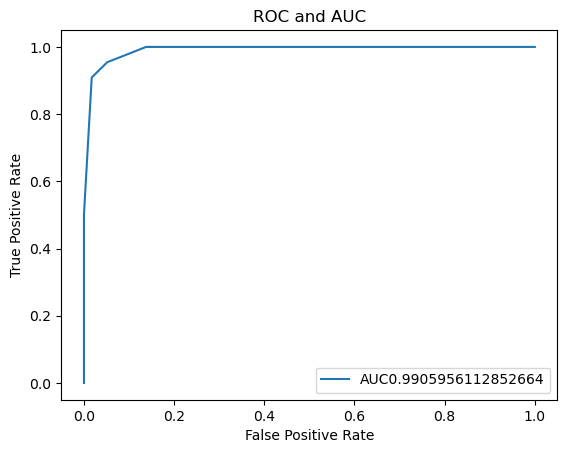

In [22]:
plt.plot(fpr, tpr, label="AUC" + str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.title("ROC and AUC")
plt.show()

We can say it is a good model